### Monterey Wharf 2 - Seasonal cycle

Start by importing libraries and reading data into a Pandas data frame.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import harmonic_Teddy

filename = 'data_files/Monterey_Wharf2_shorestation_hourly.csv'
df = pd.read_csv(filename,parse_dates=[0])

The `unix_time` variable is the number of seconds since Jan-1-1970. The `Date_Time` variable contains the same times in in the DateTime64 format used by Numpy and Pandas. This is useful for plotting.

In [11]:
unix_time = np.array(df['unix_time'])
Date_Time = np.array(df['Date_Time'])
Temperature = np.array(df['Temp']) # Temperature
good = (np.isfinite(Temperature) & np.isfinite(unix_time))


unix = unix_time[good]
Temp = Temperature[good]


Make a preliminary plot of the time series.

<IPython.core.display.Javascript object>


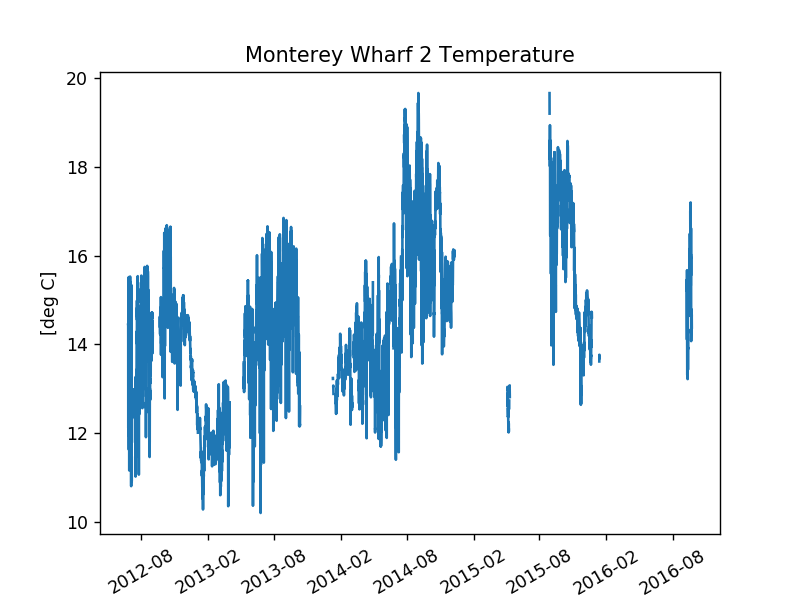

In [12]:
plt.figure()
plt.plot(Date_Time,Temperature)
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);

(array([ -1.32939401e+01,   1.98102337e-08,  -1.48567945e+00,
        -4.15435882e-01]), array([ 25023.89149526]), 4, array([  1.96922033e+11,   9.86764522e+01,   9.60891863e+01,
         3.23333018e+00]))
coefficients: [-13.293940066829403, 1.9810233690617261e-08, -1.4856794476325592, -0.41543588248074947]


<IPython.core.display.Javascript object>


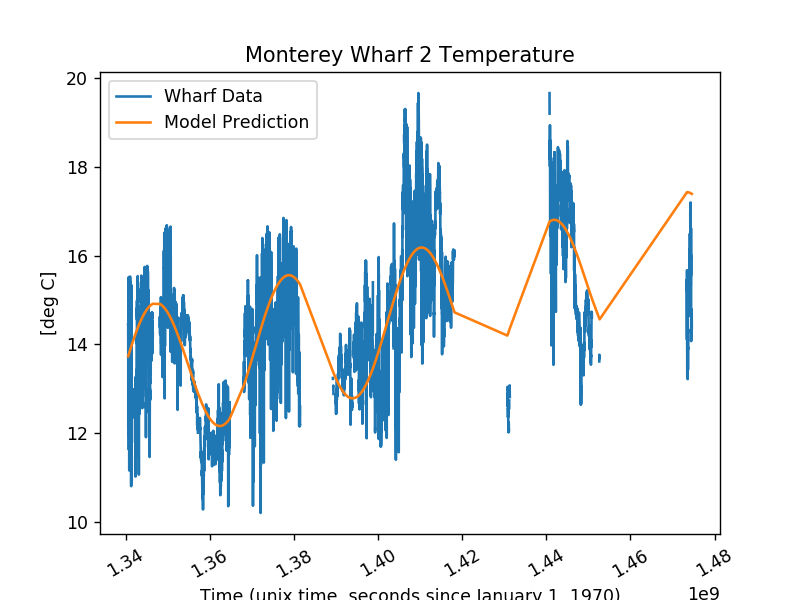

In [24]:
c = harmonic_Teddy.seasonal_fit(unix, Temp, 3.154*(10**7))
print(c)
[c0, c1, c2, c3]=[c[0][0],c[0][1],c[0][2],c[0][3]]
print('coefficients:',[c0, c1, c2, c3])
tannual = 3.154*10**7

yhat = c0 + c1*unix + c2*np.sin(2*np.pi*unix/tannual) + c3*np.cos(2*np.pi*unix/tannual)

plt.figure()
plt.plot(unix_time,Temperature, label = 'Wharf Data')
plt.ylabel('[deg C]')
plt.xlabel('Time (unix time, seconds since January 1, 1970)')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);
plt.plot(unix, yhat, label = 'Model Prediction')
plt.legend()

## Find residuals

<IPython.core.display.Javascript object>


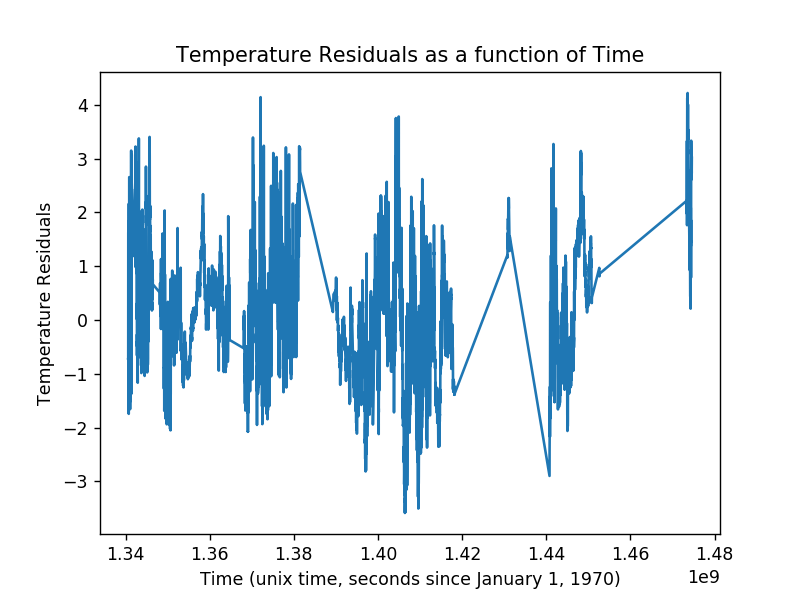

Text(0,0.5,'Temperature Residuals')

In [33]:
residuals = yhat - Temp


plt.figure()
plt.plot(unix, residuals)
plt.title('Temperature Residuals as a function of Time')
plt.xlabel('Time (unix time, seconds since January 1, 1970)')
plt.ylabel('Temperature Residuals')

## How well does the model match the data?
I believe the model matches the overall trend of the temperature data very well, but there is a lot of variability within the data. Instead of fitting the entire raw dataset, it may help to reduce the residuals if the data were averaged weekly or even monthly.